In [1]:
import torch

1. Data prepare and load
2. Build model
3. Fitting the model to data (training)
4. Making prediction and evaluating a model
5. Saving and loading a model
6. Putting it all together

torch.nn

In [2]:
import torch
from torch import nn #nn for neural network
import matplotlib.pyplot as plt

torch.__version__

'2.7.0+cu126'

Data preparing and loading

Linear regression known parameters

In [3]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*x + bias
x[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(x), len(y)

(50, 50)

Splitting the data

In [5]:
train = int(0.8*len(x))
x_train, y_train = x[:train], y[:train]
x_test, y_test = x[train:], y[train:]
len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

Visualize the data

In [6]:
def plot_predictions(train_data=x_train,
                     train_label=y_train,
                     test_data = x_test,
                     test_label = y_test,
                     predictions = None):
    """Plots training data, test data and compared predictions."""

    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_label, c="b", s=4, label="Training data")

    plt.scatter(test_data, test_label, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label = "Predictions")
    plt.legend(prop={"size":14})

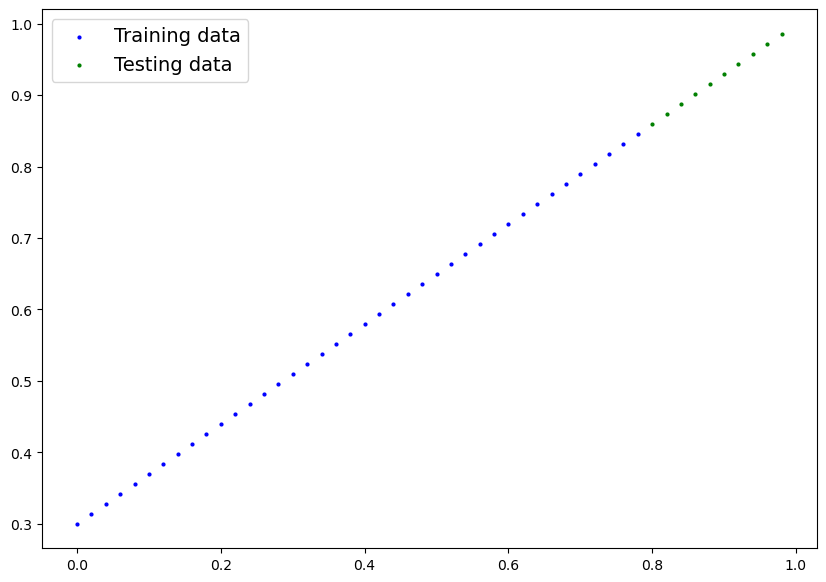

In [7]:
plot_predictions()

Build model
nn.Module

In [8]:
from torch import nn
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                               requires_grad=True,
                                               dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype = torch.float))
        
        #Forward
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

Checking the contents of our pytorch model
5:22:0

In [9]:
class LinearRegressionModel1(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights*x + self.bias

In [10]:
torch.randn(1)

tensor([-1.7686])

In [11]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [13]:
weight, bias

(0.7, 0.3)

Prediction

In [14]:
x_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [15]:
y_preds = model_0(x_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [16]:

#Its better
with torch.inference_mode():
    y_preds = model_0(x_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [17]:
with torch.no_grad():
    y_preds = model_0(x_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

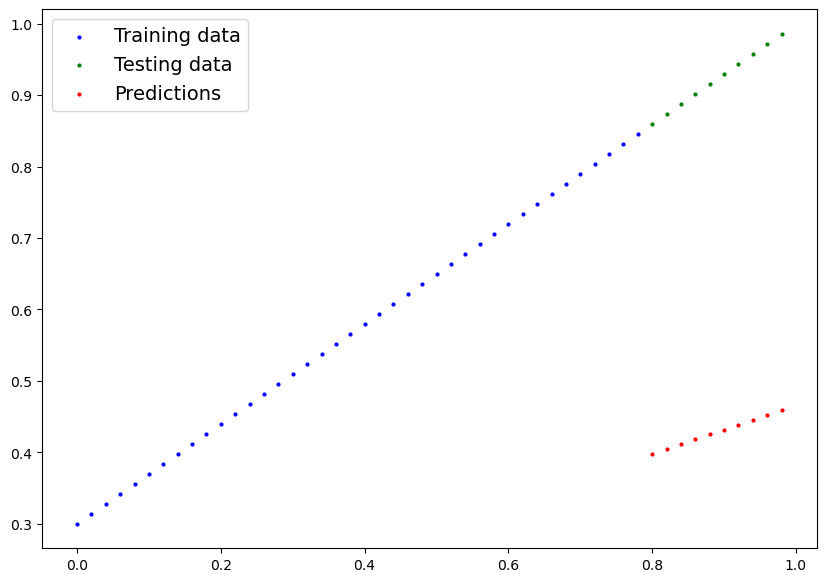

In [18]:
plot_predictions(predictions=y_preds)

*Model Train

In [19]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [20]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

6:2:0

In [21]:
#loss function
loss_fn = nn.L1Loss()

#optimizer torch.optim
#stochastic gradiant descent
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr= 0.01)


Building training loop

In [22]:
with torch.inference_mode():
    list(model_0.parameters())
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [23]:
list(model_0.eval().parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [24]:
epochs = 10
#0. Loop through data
for epoch in range(epochs):
    model_0.train()
    #1. Forward pass
    y_pred = model_0(x_train)

    #2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    #3. Oprimizer 
    optimizer.zero_grad()

    #4. Perform backward propagation
    loss.backward()

    #5. Optimizer
    optimizer.step()

    #testing
    model_0.eval()

In [25]:
with torch.inference_mode():
    y_pred_new = model_0(x_test)

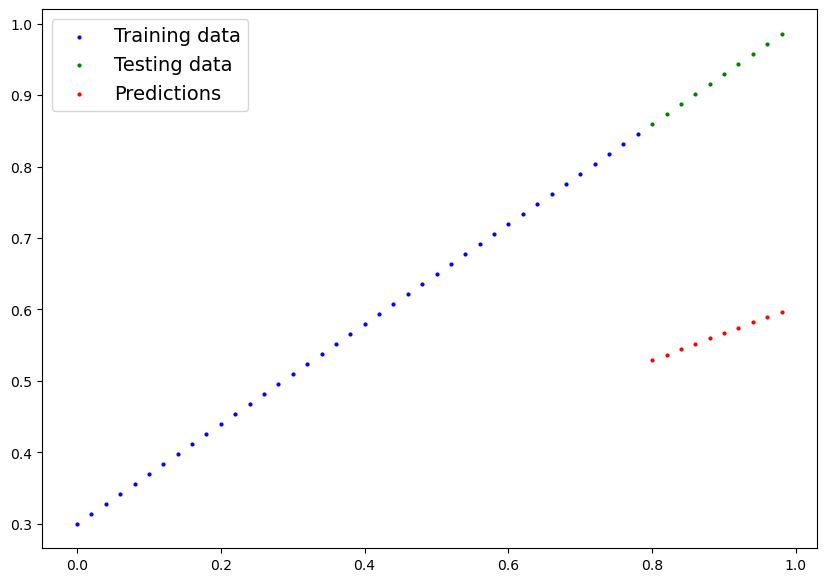

In [26]:
plot_predictions(predictions = y_pred_new)

In [27]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.2288]))])

In [36]:
torch.manual_seed(42)
epochs = 200
epoch_count = []
train_loss_values= []
test_loss_values = []
for epoch in range(epochs):
    
    model_0.train()
    y_pred = model_0(x_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(x_test)
        test_loss = loss_fn(test_pred, y_test)
        
    if epoch%10==0:
        epoch_count.append(epoch)
        train_loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch : {epoch} | MAE Train Loss : {loss} | MAE Test loss : {test_loss}")
        print(model_0.state_dict())

Epoch : 0 | MAE Train Loss : 0.021020207554101944 | MAE Test loss : 0.04819049686193466
OrderedDict({'weights': tensor([0.5972]), 'bias': tensor([0.3433])})
Epoch : 10 | MAE Train Loss : 0.01758546568453312 | MAE Test loss : 0.04060482233762741
OrderedDict({'weights': tensor([0.6141]), 'bias': tensor([0.3358])})
Epoch : 20 | MAE Train Loss : 0.014155393466353416 | MAE Test loss : 0.03233227878808975
OrderedDict({'weights': tensor([0.6313]), 'bias': tensor([0.3288])})
Epoch : 30 | MAE Train Loss : 0.010716589167714119 | MAE Test loss : 0.024059748277068138
OrderedDict({'weights': tensor([0.6485]), 'bias': tensor([0.3218])})
Epoch : 40 | MAE Train Loss : 0.0072835334576666355 | MAE Test loss : 0.016474086791276932
OrderedDict({'weights': tensor([0.6654]), 'bias': tensor([0.3143])})
Epoch : 50 | MAE Train Loss : 0.0038517764769494534 | MAE Test loss : 0.008201557211577892
OrderedDict({'weights': tensor([0.6826]), 'bias': tensor([0.3073])})
Epoch : 60 | MAE Train Loss : 0.00893248245120048

In [37]:
import numpy as np
np.array(torch.tensor(train_loss_values).cpu().numpy())

array([0.02102021, 0.01758547, 0.01415539, 0.01071659, 0.00728353,
       0.00385178, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
       0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
       0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248],
      dtype=float32)

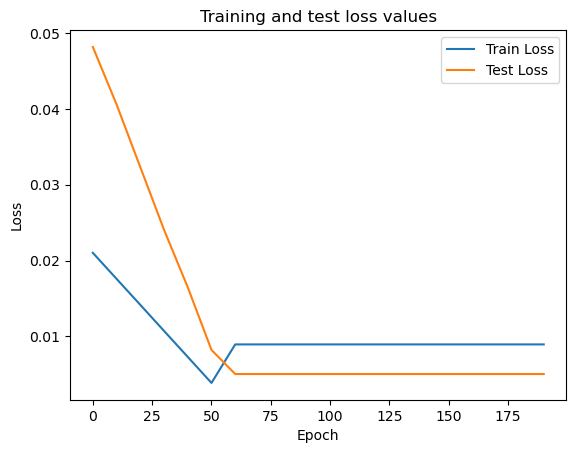

In [38]:
plt.plot(epoch_count, np.array(torch.tensor(train_loss_values).cpu().numpy()), label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and test loss values")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

In [39]:
with torch.inference_mode():
    y_preds_new = model_0(x_test)

In [40]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [41]:
weight, bias

(0.7, 0.3)

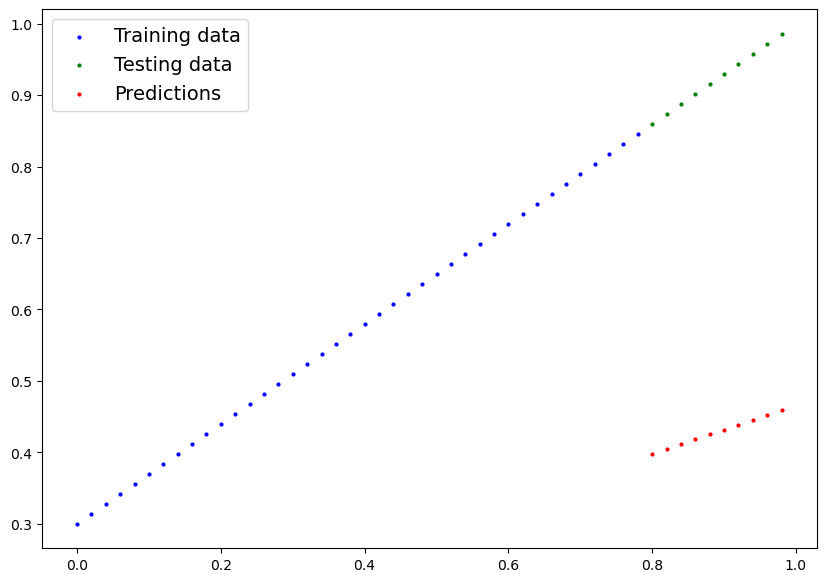

In [42]:
plot_predictions(predictions=y_preds)

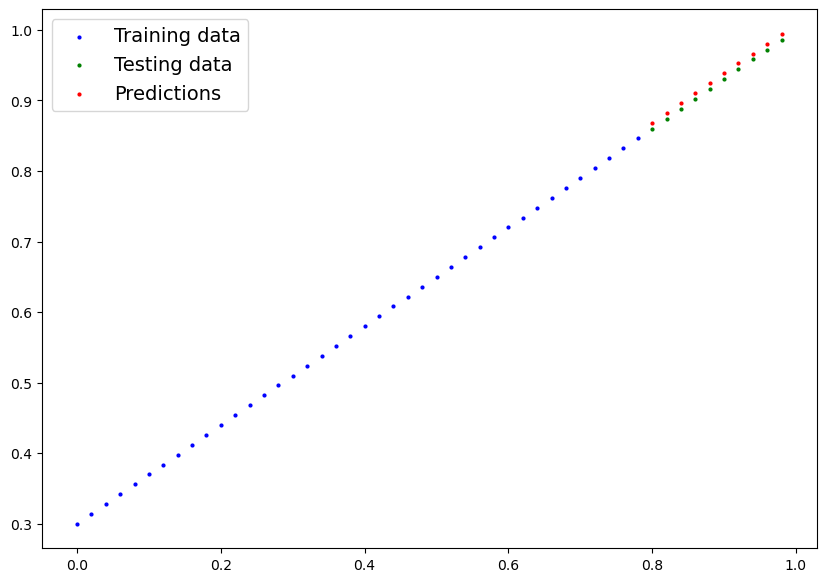

In [43]:
plot_predictions(predictions=y_preds_new)

completed 7.15 hours

Saving a model in PyTorch
There are three different methods to save
1. torch.save() -> allows to save in pickle format
2. torch.load() -> allows to load a save PyTorch object
3. torch.nn.Module.load_state_dict() -> load a models saved state dictionary

Save

In [47]:
from pathlib import Path
#create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#model save path
MODEL_NAME = "Pytorch_Workflow_01.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

#save the model stat_dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to : models/Pytorch_Workflow_01.pth


7.29 hours

Loading PyTorch Model from previous saved

In [50]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [51]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [52]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [53]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(x_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [54]:
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(x_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [55]:
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

7.38 hours

Putting it all together

In [1]:
import torch
import matplotlib.pyplot as plt 
from torch import nn
torch.__version__

'2.7.0+cu126'

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"device use : {device}")

device use : cuda


In [3]:
!nvidia-smi

Mon May 26 15:39:40 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.247.01             Driver Version: 535.247.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce MX130           Off | 00000000:06:00.0 Off |                  N/A |
| N/A   52C    P8              N/A / 200W |     11MiB /  2048MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Data

In [4]:
weight = 0.9
bias = 0.6

start = 0
end = 2
step = 0.02

x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*x+bias
x[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.6000],
         [0.6180],
         [0.6360],
         [0.6540],
         [0.6720],
         [0.6900],
         [0.7080],
         [0.7260],
         [0.7440],
         [0.7620]]))

In [5]:
train_split = int(0.8*len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]
len(x_train), len(y_train), len(x_test), len(y_test)

(80, 80, 20, 20)

In [6]:
def plot_predictions(train_data=x_train,
                     train_label=y_train,
                     test_data = x_test,
                     test_label = y_test,
                     predictions = None):
    """Plots training data, test data and compared predictions."""

    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_label, c="b", s=4, label="Training data")

    plt.scatter(test_data, test_label, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label = "Predictions")
    plt.legend(prop={"size":14})

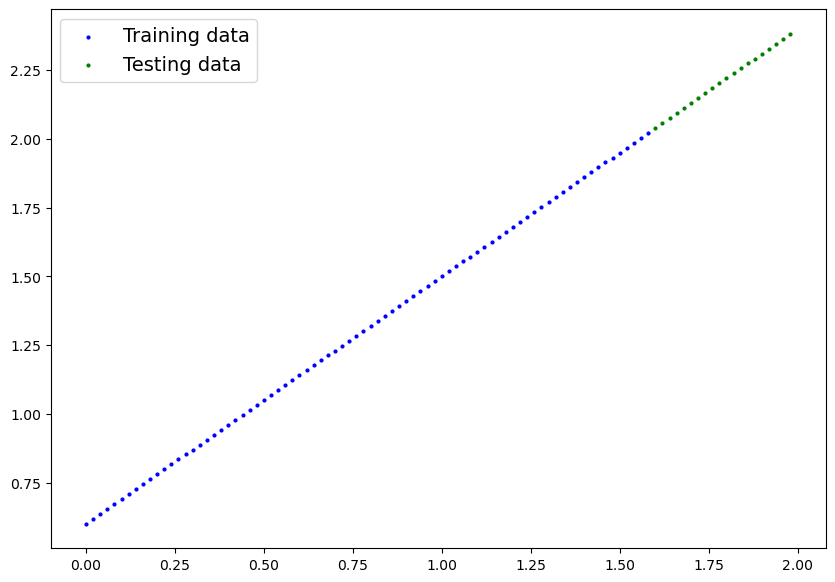

In [66]:
plot_predictions(x_train, y_train, x_test, y_test)

In [ ]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
            
  

In [8]:
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

8 hours

In [9]:
next(model_1.parameters()).device

device(type='cpu')

In [11]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

Training
1. Loss function
2. Optimizer
3. Training Loop
4. Testing loop

In [12]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.001)

In [22]:
torch.manual_seed(42)
epoch_count = []
train_value_loss = []
test_value_loss = []
epochs = 400

#Put data into the device
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):

    model_1.train()
    y_pred = model_1(x_train)
    train_loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(x_test)
        test_loss = loss_fn(test_pred, y_test)
    if epoch%10==0:
        epoch_count.append(epoch)
        train_value_loss.append(train_loss)
        test_value_loss.append(test_loss)
        print(f"Epochs : {epoch} | Train Loss : {train_loss} | Test Loss: {test_loss}")

Epochs : 0 | Train Loss : 0.024628475308418274 | Test Loss: 0.0487007275223732
Epochs : 10 | Train Loss : 0.023719405755400658 | Test Loss: 0.046926844865083694
Epochs : 20 | Train Loss : 0.022809967398643494 | Test Loss: 0.0451529286801815
Epochs : 30 | Train Loss : 0.021900847554206848 | Test Loss: 0.04331096634268761
Epochs : 40 | Train Loss : 0.020991502329707146 | Test Loss: 0.04153705760836601
Epochs : 50 | Train Loss : 0.020082291215658188 | Test Loss: 0.03969511017203331
Epochs : 60 | Train Loss : 0.019173037260770798 | Test Loss: 0.037921227514743805
Epochs : 70 | Train Loss : 0.018263738602399826 | Test Loss: 0.03607925400137901
Epochs : 80 | Train Loss : 0.01735456846654415 | Test Loss: 0.03430532291531563
Epochs : 90 | Train Loss : 0.016445187851786613 | Test Loss: 0.032463397830724716
Epochs : 100 | Train Loss : 0.015536095015704632 | Test Loss: 0.03068949095904827
Epochs : 110 | Train Loss : 0.014626634307205677 | Test Loss: 0.02884753979742527
Epochs : 120 | Train Loss :

In [23]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8989]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.5995], device='cuda:0'))])

In [24]:
weight, bias

(0.9, 0.6)

In [25]:
with torch.inference_mode():
    y_preds_new = model_1(x_test)

8.13 hours

In [28]:
model_1.eval()
with torch.inference_mode():
    y_preds = model_1(x_test)
y_preds

tensor([[2.0377],
        [2.0557],
        [2.0737],
        [2.0917],
        [2.1097],
        [2.1276],
        [2.1456],
        [2.1636],
        [2.1816],
        [2.1996],
        [2.2175],
        [2.2355],
        [2.2535],
        [2.2715],
        [2.2894],
        [2.3074],
        [2.3254],
        [2.3434],
        [2.3614],
        [2.3793]], device='cuda:0')

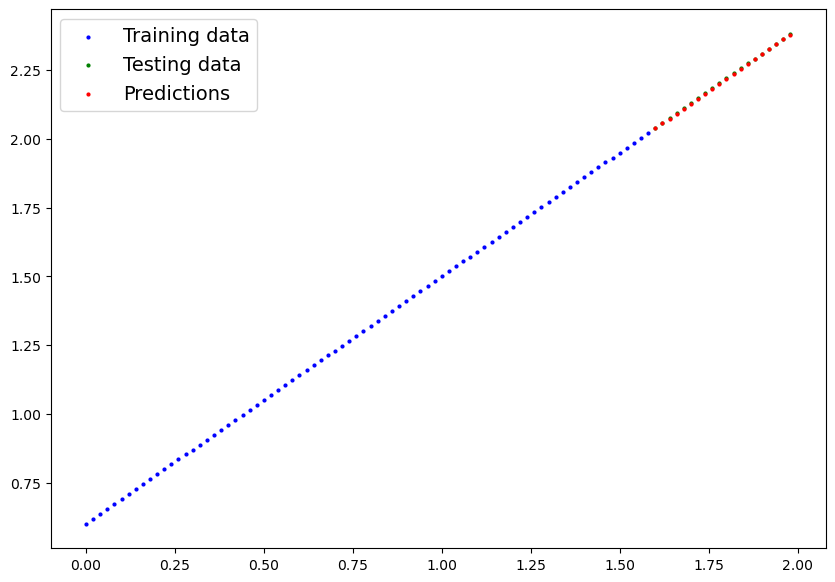

In [30]:
plot_predictions(predictions=y_preds.cpu())

Saving and loding model

In [37]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok = True)

MODEL_NAME = "Regression_V2.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

print(f"Model Path is : {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Model Path is : models/Regression_V2.pth


In [38]:
loaded_model_1 = LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [39]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [40]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8989]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.5995], device='cuda:0'))])

In [41]:
loaded_model_1.eval()
with torch.inference_mode():
    y_pred_new = loaded_model_1(x_test)
y_pred_new

tensor([[2.0377],
        [2.0557],
        [2.0737],
        [2.0917],
        [2.1097],
        [2.1276],
        [2.1456],
        [2.1636],
        [2.1816],
        [2.1996],
        [2.2175],
        [2.2355],
        [2.2535],
        [2.2715],
        [2.2894],
        [2.3074],
        [2.3254],
        [2.3434],
        [2.3614],
        [2.3793]], device='cuda:0')

In [44]:
y_pred_new==y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

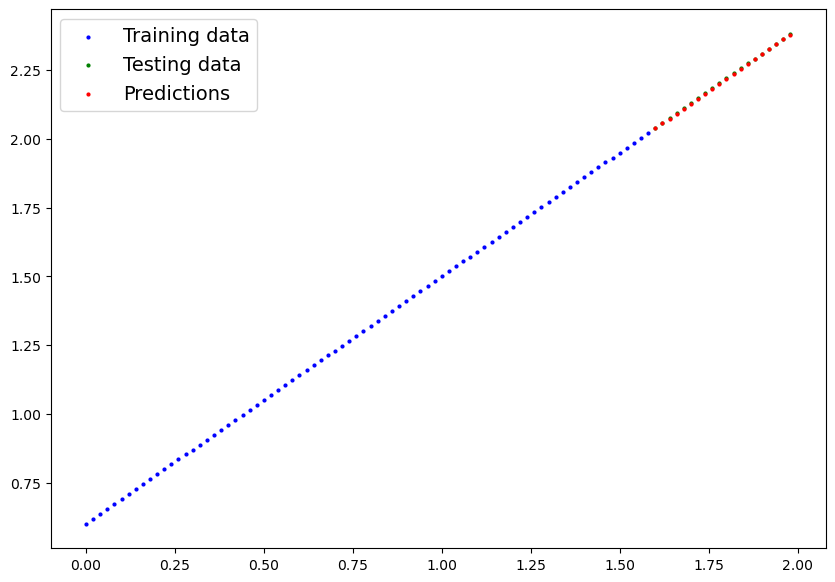

In [42]:
plot_predictions(predictions=y_pred_new.cpu())

completed 8.45 hours